In [3]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import seaborn as sns

In [4]:
path = r'C:/Users/user/Desktop/VS_studio_projects/data'
data = pd.read_csv(path + '/red_wine_quality_Final.csv', encoding='utf-8', decimal='.', delimiter=',')

display(data.head())

,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,NaN,3.51,0.56,9.4,5


In [5]:
print(data.columns)

Index(['fixedAcidity', 'volatileAcidity', 'citricAcid', 'residualSugar',
       'chlorides', 'freeSulfurDioxide', 'totalSulfurDioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')


1599


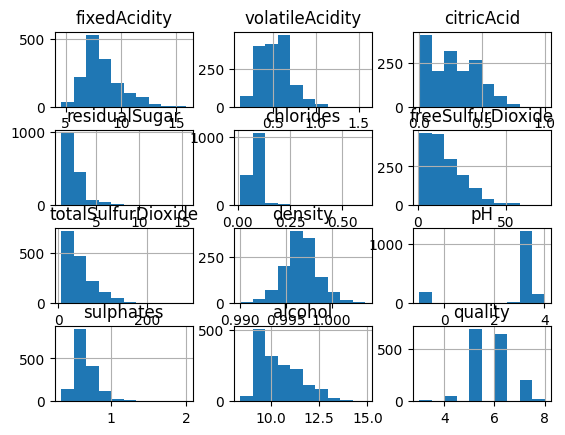

In [6]:
hist=data.hist()

print(len(data))

Check NaN values

In [7]:
print(len(data))
print("missing:", data.isna().sum())

1599
missing: fixedAcidity           56
volatileAcidity        27
citricAcid              0
residualSugar          27
chlorides              27
freeSulfurDioxide       0
totalSulfurDioxide     27
density               334
pH                      0
sulphates              27
alcohol                27
quality                 0
dtype: int64


[[ 1.         -0.2537011   0.67487542  0.11336425  0.10353842 -0.15539572
  -0.10542626  0.66500291 -0.06429664  0.1821378  -0.05855219  0.12802876]
 [-0.2537011   1.         -0.55126588  0.00102015  0.05709389 -0.0076198
   0.08324432  0.02538268  0.02406308 -0.26515252 -0.20132027 -0.38927151]
 [ 0.67487542 -0.55126588  1.          0.14590904  0.19741941 -0.06097813
   0.03402463  0.35865011 -0.05614736  0.30792143  0.11133387  0.22637251]
 [ 0.11336425  0.00102015  0.14590904  1.          0.06102532  0.19206779
   0.20946563  0.34908664 -0.02654358  0.00703181  0.04217195  0.01414215]
 [ 0.10353842  0.05709389  0.19741941  0.06102532  1.          0.00971072
   0.0502456   0.20798148 -0.08715429  0.36135362 -0.22052795 -0.13281364]
 [-0.15539572 -0.0076198  -0.06097813  0.19206779  0.00971072  1.
   0.66672047 -0.00527524  0.05446822  0.055788   -0.06983189 -0.05065606]
 [-0.10542626  0.08324432  0.03402463  0.20946563  0.0502456   0.66672047
   1.          0.09297546  0.01687198  0.

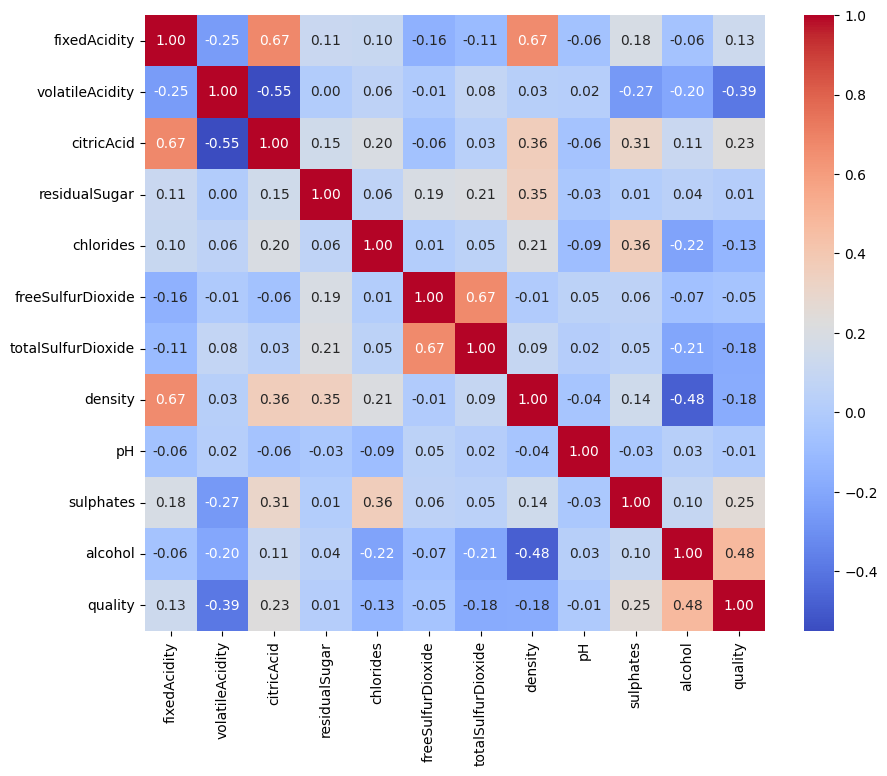

In [8]:
# correlation matrix
corr = data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", ax=ax)

print(corr.values)

**PCA na datech** <br>
nedava upnlne smysl, jelikoz se nezbavime vysledne dimenzionality (z 11 na 8). takze se da kompletne vynechat

In [9]:


# #data = data.fillna(data.mean())

# # decorelation dataset
# from sklearn.decomposition import PCA   
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data.select_dtypes(include=[np.number]))  # Exclude non-numeric columns

# pca = PCA(n_components=8) 
# data_reduced = pca.fit_transform(data_scaled)

# # before PCA
# # sns.pairplot(data.select_dtypes(include=[np.number]))  # Exclude non-numeric columns
# # plt.suptitle('Pairplot of Wine Quality Dataset', y=1.02) 

# plt.figure(figsize=(8, 6))
# plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c='blue', alpha=0.5)
# plt.title('PCA of Wine Quality Dataset')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')

# # % of lost information with PCA
# explained_variance = pca.explained_variance_ratio_ 
# print("Explained variance by each component:", explained_variance)
# print("Total explained variance (8 components):", np.sum(explained_variance))
# print("Total lost variance:", 1 - np.sum(explained_variance))

Feature: fixedAcidity
  Mean: 8.31898898250162
  Median: 7.9
  Standard Deviation: 1.745476574275394
  Min: 4.6
  Max: 15.9
missing: 56


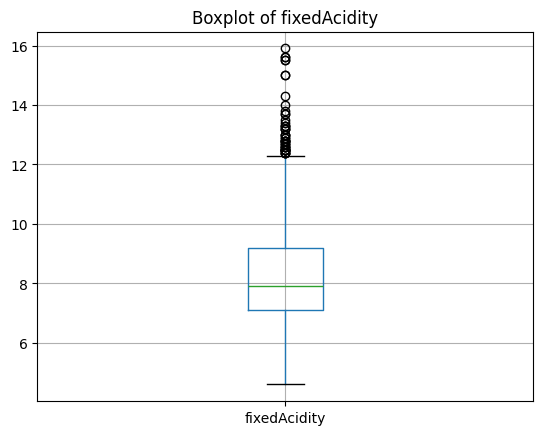

Feature: volatileAcidity
  Mean: 0.5281933842239185
  Median: 0.52
  Standard Deviation: 0.17913020845009253
  Min: 0.12
  Max: 1.58
missing: 27


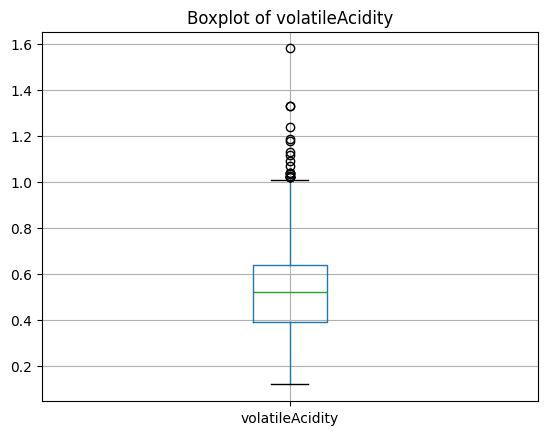

Feature: citricAcid
  Mean: 0.2709756097560976
  Median: 0.26
  Standard Deviation: 0.19480113740531857
  Min: 0.0
  Max: 1.0
missing: 0


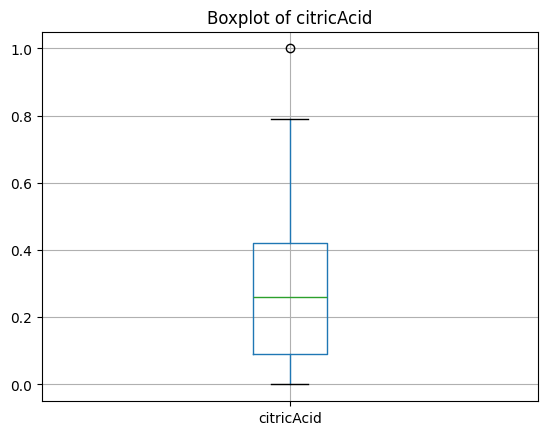

Feature: residualSugar
  Mean: 2.5421437659033077
  Median: 2.2
  Standard Deviation: 1.4183653718772942
  Min: 0.9
  Max: 15.5
missing: 27


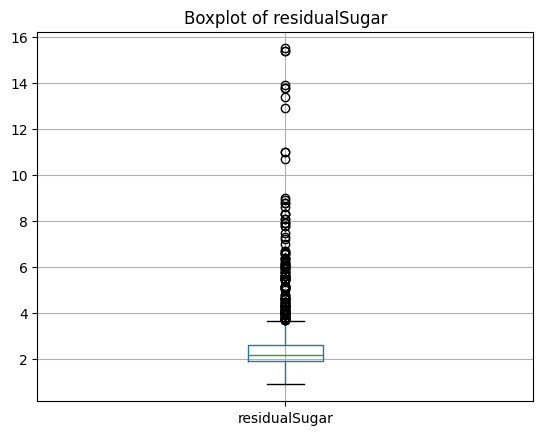

Feature: chlorides
  Mean: 0.08719783715012722
  Median: 0.079
  Standard Deviation: 0.04594243674129356
  Min: 0.012
  Max: 0.611
missing: 27


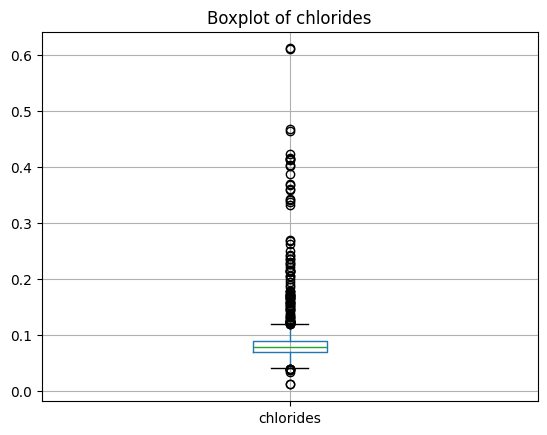

Feature: freeSulfurDioxide
  Mean: 15.874921826141339
  Median: 14.0
  Standard Deviation: 10.460156969809725
  Min: 1.0
  Max: 72.0
missing: 0


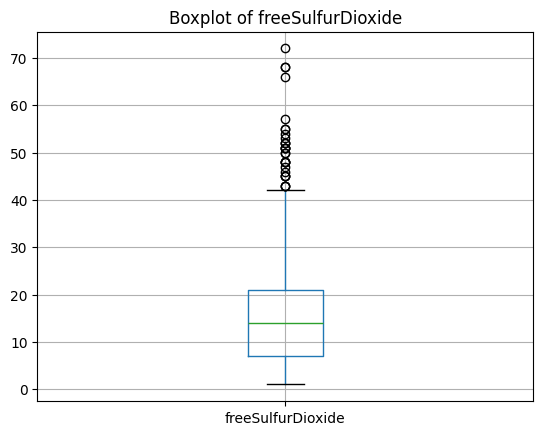

Feature: totalSulfurDioxide
  Mean: 46.44338422391858
  Median: 38.0
  Standard Deviation: 32.797174479647765
  Min: 6.0
  Max: 289.0
missing: 27


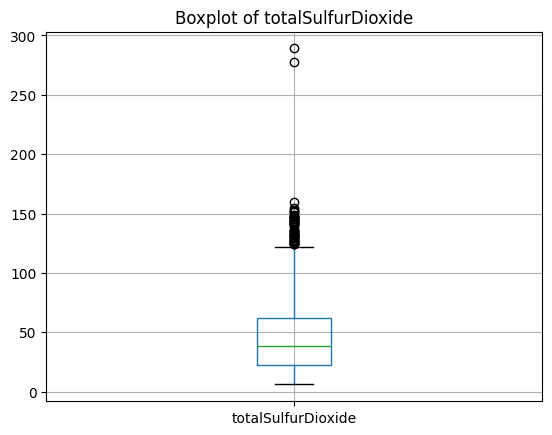

Feature: density
  Mean: 0.9967417944664031
  Median: 0.99672
  Standard Deviation: 0.001879391234793521
  Min: 0.99007
  Max: 1.00369
missing: 334


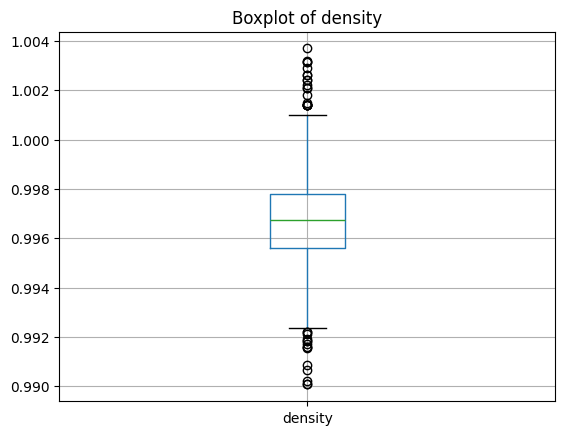

Feature: pH
  Mean: 2.776597873671044
  Median: 3.29
  Standard Deviation: 1.4316199661326916
  Min: -1.0
  Max: 4.01
missing: 0


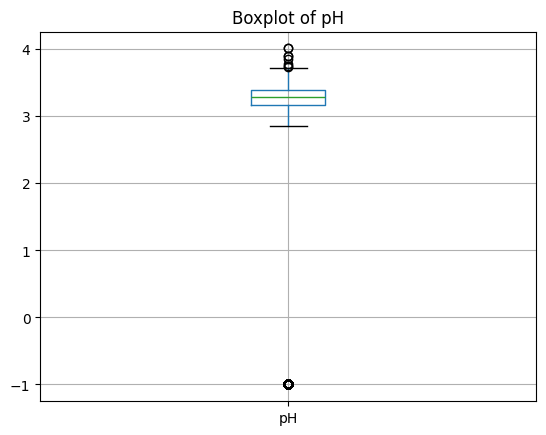

Feature: sulphates
  Mean: 0.6583651399491094
  Median: 0.62
  Standard Deviation: 0.16965779465777814
  Min: 0.33
  Max: 2.0
missing: 27


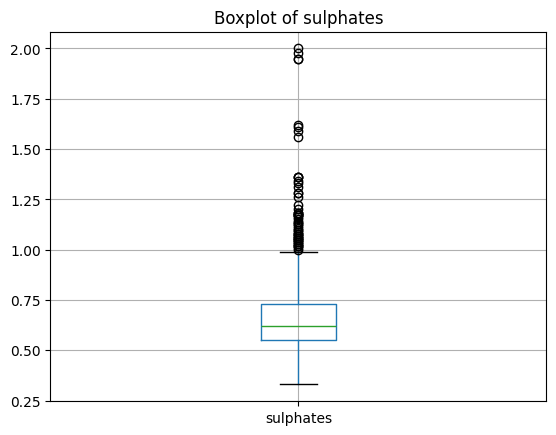

Feature: alcohol
  Mean: 10.425922391857508
  Median: 10.2
  Standard Deviation: 1.0647326071051921
  Min: 8.4
  Max: 14.9
missing: 27


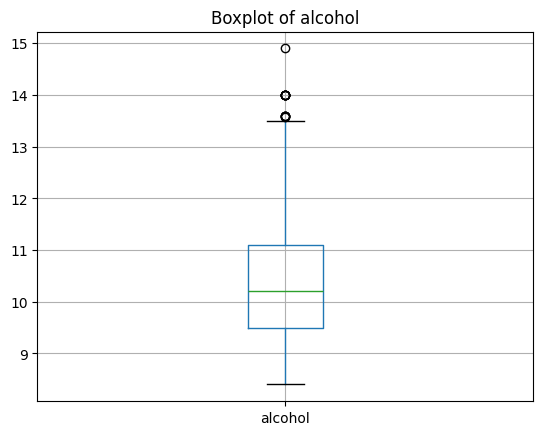

Feature: quality
  Mean: 5.6360225140712945
  Median: 6.0
  Standard Deviation: 0.807569439734705
  Min: 3
  Max: 8
missing: 0


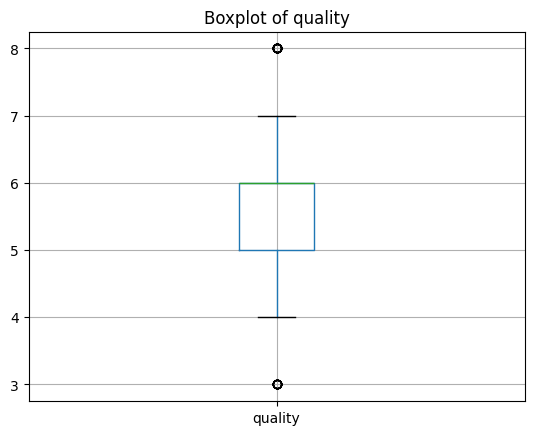

In [10]:
# boxplot for outliers detection

# Describing important features

for column in data.select_dtypes(include=[np.number]).columns:
    print(f"Feature: {column}")
    print(f"  Mean: {data[column].mean()}")
    print(f"  Median: {data[column].median()}")
    print(f"  Standard Deviation: {data[column].std()}")
    print(f"  Min: {data[column].min()}")
    print(f"  Max: {data[column].max()}")
    print("missing:", data[column].isna().sum())


    data.boxplot(column=[column])
    plt.title(f'Boxplot of {column}')
    # print(f"  Number of Outliers: {outliers.shape[0]}")
    plt.show()
    # num of outliers
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    


| Název                    | Význam                                                    | Jednotka               | Typický rozsah       | Interpretace / poznámky                                                     |
| ------------------------ | --------------------------------------------------------- | ---------------------- | -------------------- | --------------------------------------------------------------------------- |
| <code style="color : orange">**fixed acidity** </code>       | Množství **neprchavých kyselin** (hlavně vinná, jablečná) | g/L                    | 3.8 - 16 | Vyšší → víno je kyselejší, stabilnější; extrémně vysoké = neobvyklé         |
| **volatile acidity**     | **Prchavé kyseliny**, především kyselina octová           | g/L (acetic acid)      | 0.1 – 1.5            | Vyšší → může znamenat „octový“ zápach, zhoršená kvalita                     |
| **citric acid**          | Kyselina citronová (přirozená i přidaná)                  | g/L                    | 0.0 – 1.0            | Dodává svěžest a chuť; 0 = ploché víno, >0.5 = svěží                        |
| <code style="color : red">**residual sugar**</code>    | **Zbytkový cukr** po fermentaci                           | g/L                    | 0.9 – 15 (běžně <10) | Vyšší → sladší víno; u suchých vín <4                                       |
| <code style="color : orange">**chlorides**  </code>            | **Chloridy** (obsah soli)                                 | g/L (NaCl)             | 0.01 – 0.6           | Vyšší → může kazit chuť; nad 0.2 je už podezřelé                            |
| <code style="color : yellow"> **free sulfur dioxide** </code> | Volný **oxid siřičitý** (SO₂) – chrání víno před oxidací  | mg/L                   | 1 – 70               | Vyšší → lepší stabilita, ale může ovlivnit vůni                             |
| **total sulfur dioxide** | Celkové množství SO₂ (volný + vázaný)                     | mg/L                   | 6 – 280              | Nad 150 už může být na hranici povolených hodnot; silně koreluje s free SO₂ |
| <code style="color : pink"> **density**</code>              | Hustota vína                                              | g/cm³ (nebo ekv. g/mL) | 0.990 – 1.004        | Vyšší hustota → více cukru nebo méně alkoholu                               |
| <code style="color : red"> **pH**</code>                 | Kyselost (negativní log. koncentrace H⁺)                  | bez jednotky           | 2.8 – 4.0            | Nižší pH = kyselejší víno; vyšší pH = plošší chuť, menší stabilita          |
| **sulphates**            | Síranové ionty (SO₄²⁻), indikátor konzervantů             | g/L (K₂SO₄)            | 0.3 – 2            | Vyšší → stabilnější, ale někdy „ostrý“ dojem                                |
| **alcohol**              | Obsah alkoholu                                            | % objemu (v/v)         | 8 – 15 %             | Vyšší → plnější chuť; silně koreluje s kvalitou                             |
| **quality**              | Hodnocení kvality vína (panel odborníků)                  | 0–10 (typ. 3–9)        | 3 – 9                | Cílová proměnná, ordinalní (vyšší = lepší)                                  |



fixed acidity - vicero outlieru, kteri nedavaji smysl <br>
residual sugar - neni rozptyl promenne jako u jinych dat <br>
chlorides - nesmyslni outlieri<br>
freeSulfurDioxide - outlieri minmo range, ale nemusi byt nutne zle<br>
density - hodne NaN hodnot, ale mohlo by jit odvodit z jinych promennych <br>
pH - urcite odstranit -1 hodnoty = nesmysl, jinak parametr vypada dobre<br>

In [11]:
# bad values correction
print("missing:", data.isna().sum())

# data['fixedAcidity'] = data['fixedAcidity'].apply(lambda x: np.nan if x > 12 else x)
# data['chlorides'] = data['chlorides'].apply(lambda x: np.nan if x > 0.13 else x)
data['pH'] = data['pH'].apply(lambda x: np.nan if x < 0 else x)


print("missing:", data.isna().sum())

missing: fixedAcidity           56
volatileAcidity        27
citricAcid              0
residualSugar          27
chlorides              27
freeSulfurDioxide       0
totalSulfurDioxide     27
density               334
pH                      0
sulphates              27
alcohol                27
quality                 0
dtype: int64
missing: fixedAcidity           56
volatileAcidity        27
citricAcid              0
residualSugar          27
chlorides              27
freeSulfurDioxide       0
totalSulfurDioxide     27
density               334
pH                    199
sulphates              27
alcohol                27
quality                 0
dtype: int64


In [12]:
# Imputation rules
# Thresholds:
#  - drop columns with >= 50% missing
#  - for numeric cols with 20% <= missing < 50% use KNN imputer
#  - for numeric cols with < 20% missing fill with median
#  - for non-numeric cols fill with mode

import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# configurable thresholds
DROP_COL_THRESHOLD = 0.5   # drop column if >= 50% missing
# ADVANCED_IMPUTE_THRESHOLD = 0.2  # use KNN if >=20% and <50%

print("Dataset shape:", data.shape)
missing = data.isna().sum()
missing_perc = missing / len(data)
summary = pd.DataFrame({"missing": missing, "missing_perc": missing_perc})
print("Missing values (sorted):")
print(summary.sort_values('missing_perc', ascending=False))

# 1) Drop columns with very high missingness
to_drop = summary[summary['missing_perc'] >= DROP_COL_THRESHOLD].index.tolist()
if to_drop:
    print("Dropping columns (>= {:.0%} missing):".format(DROP_COL_THRESHOLD), to_drop)
    data = data.drop(columns=to_drop)
else:
    print("No columns to drop based on threshold.")

# refresh summary
missing = data.isna().sum()
missing_perc = missing / len(data)
summary = pd.DataFrame({"missing": missing, "missing_perc": missing_perc})

numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = data.select_dtypes(exclude=[np.number]).columns.tolist()


# 3) Advanced imputation (KNN) for numeric cols with 20% <= missing < 50%
cols_for_knn = [c for c in numeric_cols if summary.loc[c, 'missing_perc'] < DROP_COL_THRESHOLD]
if cols_for_knn:
    print("Applying KNN imputer to columns:", cols_for_knn)
    knn_imputer = KNNImputer(n_neighbors=5)
    # KNNImputer expects numeric array; we will impute on the full numeric matrix but only keep replacements for the selected cols
    numeric_matrix = data[numeric_cols]
    imputed = knn_imputer.fit_transform(numeric_matrix)
    imputed_df = pd.DataFrame(imputed, columns=numeric_cols, index=data.index)
    # copy imputed values back only for the targeted columns
    for c in cols_for_knn:
        data[c] = imputed_df[c]
    print("KNN imputation finished.")
else:
    print("No columns require KNN imputation based on thresholds.")

print("Missing values after imputation:")
print(data.isna().sum())


Dataset shape: (1599, 12)
Missing values (sorted):
                    missing  missing_perc
density                 334      0.208881
pH                      199      0.124453
fixedAcidity             56      0.035022
volatileAcidity          27      0.016886
alcohol                  27      0.016886
residualSugar            27      0.016886
totalSulfurDioxide       27      0.016886
chlorides                27      0.016886
sulphates                27      0.016886
citricAcid                0      0.000000
freeSulfurDioxide         0      0.000000
quality                   0      0.000000
No columns to drop based on threshold.
Applying KNN imputer to columns: ['fixedAcidity', 'volatileAcidity', 'citricAcid', 'residualSugar', 'chlorides', 'freeSulfurDioxide', 'totalSulfurDioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
KNN imputation finished.
Missing values after imputation:
fixedAcidity          0
volatileAcidity       0
citricAcid            0
residualSugar         0
ch

Pro vyhodnocení významu jednotlivých prediktorů byla provedena analýza pomocí tří metod: Ridge regresní analýzy (L2 regularizace), LASSO (L1 regularizace) a Random Forest regresoru. Tyto metody byly zvoleny pro porovnání lineárního a nelineárního přístupu k výběru významných proměnných a pro posouzení jejich stability v přítomnosti multikolinearity.

<Figure size 1000x600 with 0 Axes>

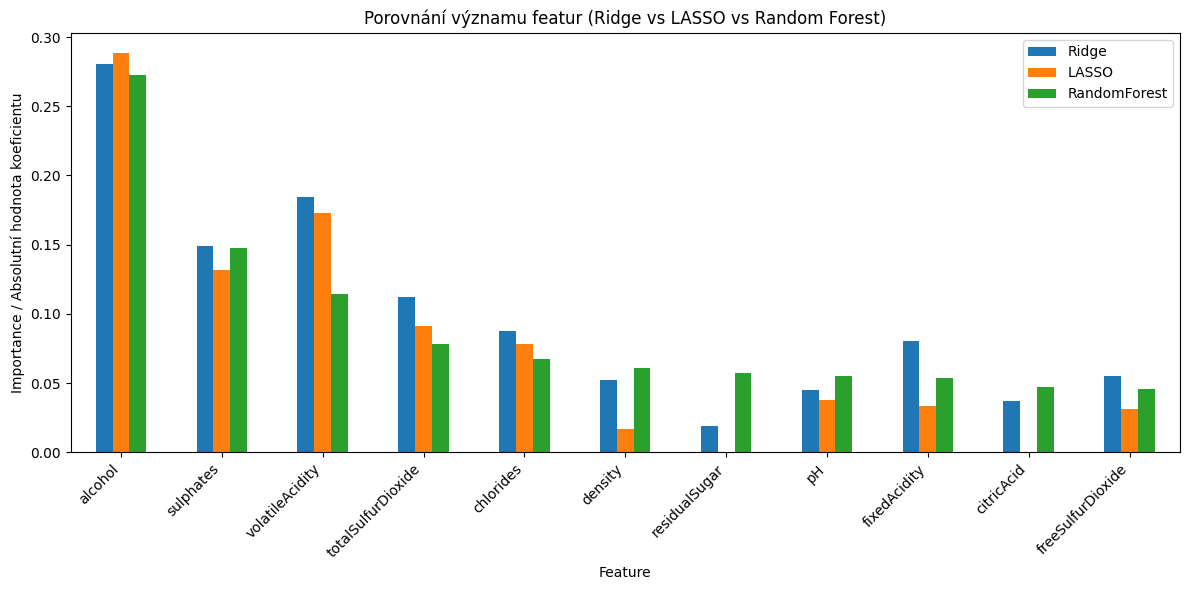

Top 5 nejdůležitějších featur napříč modely:
Feature
alcohol               0.280602
volatileAcidity       0.157024
sulphates             0.143016
totalSulfurDioxide    0.093854
chlorides             0.077508
Name: MeanImportance, dtype: float64
Důležité featury (Mean Importance > 0.05): ['alcohol', 'sulphates', 'volatileAcidity', 'totalSulfurDioxide', 'chlorides', 'fixedAcidity']


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


# --- 2. Rozdělení vstupů a cíle ---
X = data.drop(columns=['quality'])
y = data['quality']

# --- 4. Rozdělení dat na trénovací a testovací část ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. Standardizace ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- 5. Modely ---
ridge = Ridge(alpha=0.0, random_state=42)
lasso = Lasso(alpha=0.01, random_state=42)
rf = RandomForestRegressor(n_estimators=200, random_state=42)

# --- 6. Trénink ---
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
rf.fit(X_train, y_train)

# --- 7. Získání "importance" ---
ridge_importance = np.abs(ridge.coef_)
lasso_importance = np.abs(lasso.coef_)
rf_importance = rf.feature_importances_

# --- 8. Vizuální srovnání ---
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Ridge': ridge_importance,
    'LASSO': lasso_importance,
    'RandomForest': rf_importance
}).set_index('Feature')

importance_df = importance_df.sort_values('RandomForest', ascending=False)



plt.figure(figsize=(10, 6))
importance_df.plot(kind='bar', figsize=(12,6))
plt.title('Porovnání významu featur (Ridge vs LASSO vs Random Forest)')
plt.ylabel('Importance / Absolutní hodnota koeficientu')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- 9. Volitelně: vypsání top 5 featur podle průměrné importance ---
importance_df['MeanImportance'] = importance_df.mean(axis=1)
print("Top 5 nejdůležitějších featur napříč modely:")
print(importance_df['MeanImportance'].sort_values(ascending=False).head(5))

# uchovani nejdulezitejsich featur
important_features = importance_df[importance_df['MeanImportance'] > 0.05].index.tolist()
print("Důležité featury (Mean Importance > 0.05):", important_features)



LASSO
alcohol               0.308054
volatileAcidity       0.181036
sulphates             0.094836
totalSulfurDioxide    0.078625
fixedAcidity          0.057526

RF
alcohol               0.270091
sulphates             0.147970
volatileAcidity       0.112703
totalSulfurDioxide    0.078205
chlorides             0.065450

Ridge
alcohol               0.316129
volatileAcidity       0.196771
sulphates             0.105396
totalSulfurDioxide    0.099119
fixedAcidity          0.085838

In [14]:
# Správná normalizace: každou metodu normalizujem zvlášť, pak průměrujeme
ridge_imp = np.abs(ridge.coef_)
lasso_imp = np.abs(lasso.coef_)
rf_imp = rf.feature_importances_

# funkce pro bezpečnou normalizaci (pokud součet 0, necháme vektorem nul)
def safe_normalize(arr):
    s = np.sum(arr)
    if s == 0:
        return np.zeros_like(arr, dtype=float)
    return arr / s

# Normalizuj každou metodu zvlášť (aby součet každé = 1)
ridge_norm = safe_normalize(ridge_imp)
lasso_norm = safe_normalize(lasso_imp)
rf_norm = safe_normalize(rf_imp)

# Vytvoř DataFrame s normalizovanými hodnotami
importance_df_norm = pd.DataFrame({
    'Ridge': ridge_norm,
    'LASSO': lasso_norm,
    'RandomForest': rf_norm
}, index=X.columns)

# Spočítej průměr (všechny metody mají stejnou váhu)
importance_df_norm['MeanImportance'] = importance_df_norm.mean(axis=1)

# Seřaď podle průměrné důležitosti
importance_df_norm = importance_df_norm.sort_values('MeanImportance', ascending=False)

print("=" * 60)
print("Normalizované a průměrované důležitosti (v procentech):")
print("=" * 60)
print((importance_df_norm * 100).round(2))

print("\nTop 5 nejdůležitějších featur (normalizované průměry):")
print(importance_df_norm['MeanImportance'].head(5))

# Selekce featur s Mean Importance > 0.05 (normalizované, tedy > 5%)
important_features = importance_df_norm[importance_df_norm['MeanImportance'] > 0.05].index.tolist()
print("\nDůležité featury (Mean Importance > 0.05, tj. > 5%):", important_features)

Normalizované a průměrované důležitosti (v procentech):
                    Ridge  LASSO  RandomForest  MeanImportance
alcohol             25.45  32.73         27.27           28.48
volatileAcidity     16.71  19.58         11.42           15.90
sulphates           13.54  14.96         14.79           14.43
totalSulfurDioxide  10.18  10.33          7.83            9.45
chlorides            7.94   8.84          6.71            7.83
fixedAcidity         7.28   3.81          5.39            5.49
pH                   4.06   4.28          5.55            4.63
freeSulfurDioxide    5.03   3.59          4.59            4.40
density              4.77   1.89          6.06            4.24
citricAcid           3.34   0.00          4.69            2.68
residualSugar        1.70   0.00          5.70            2.46

Top 5 nejdůležitějších featur (normalizované průměry):
alcohol               0.284830
volatileAcidity       0.159048
sulphates             0.144301
totalSulfurDioxide    0.094459
chloride

In [15]:
data_selected = data.loc[:, important_features]
target = data['quality']
print("Dataset s vybranými featurami:")
print(data_selected.head())
print(target.head())

Dataset s vybranými featurami:
   alcohol  volatileAcidity  sulphates  totalSulfurDioxide  chlorides  \
0      9.4             0.70       0.56                34.0      0.076   
1      9.8             0.88       0.68                67.0      0.098   
2      9.8             0.76       0.65                54.0      0.092   
3      9.8             0.28       0.58                60.0      0.075   
4      9.4             0.70       0.56                34.0      0.076   

   fixedAcidity  
0           7.4  
1           7.8  
2           7.8  
3          11.2  
4           7.4  
0    5.0
1    5.0
2    5.0
3    6.0
4    5.0
Name: quality, dtype: float64


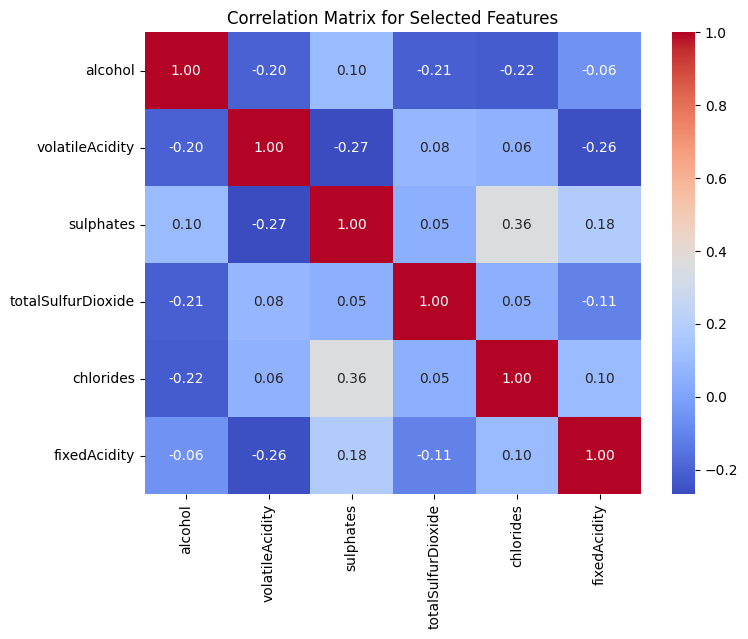

In [16]:
# correlation matrix for selected features
corr_selected = data_selected.corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_selected, annot=True, fmt=".2f", cmap="coolwarm", ax=ax)
plt.title('Correlation Matrix for Selected Features')
plt.show()

In [17]:
print(data_selected.isna().sum())


alcohol               0
volatileAcidity       0
sulphates             0
totalSulfurDioxide    0
chlorides             0
fixedAcidity          0
dtype: int64


## Jednoduchá neuronka (MLP) — ukázka

Níže je jednoduchý regresní model založený na `MLPRegressor` (scikit-learn). Buňka provede train/test split, normalizaci, natrénuje síť a vypíše metriky + vykreslí predikce vs. skutečnost a loss curve.

Training MLP (this may take a few seconds)...

MLP REGRESSOR RESULTS
TRAIN  —  MSE: 0.2958, MAE: 0.4121, R2: 0.5453
TEST   —  MSE: 0.3404, MAE: 0.4680, R2: 0.4791

MLP REGRESSOR RESULTS
TRAIN  —  MSE: 0.2958, MAE: 0.4121, R2: 0.5453
TEST   —  MSE: 0.3404, MAE: 0.4680, R2: 0.4791


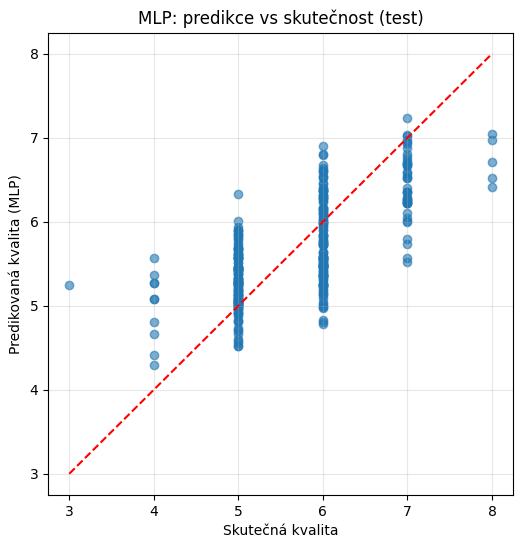

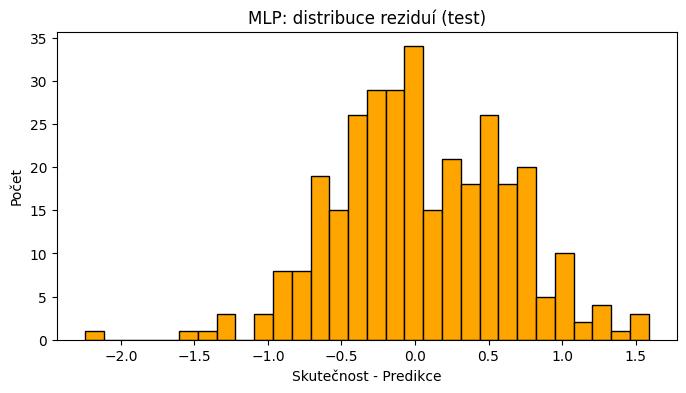

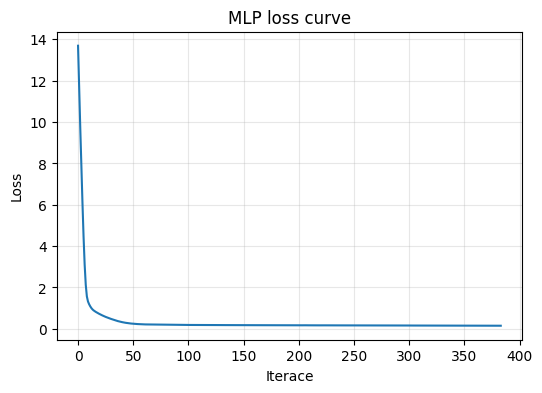


Some test samples (actual -> predicted):
6.0 -> 5.23
5.0 -> 5.06
6.0 -> 5.39
5.0 -> 5.45
6.0 -> 5.58
5.0 -> 5.25
5.0 -> 5.04
5.0 -> 4.52
5.0 -> 5.73
6.0 -> 5.73


In [18]:
# === SIMPLE MLP REGRESSOR START ===
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Použijeme `data_selected` a `target` (vytvořené dříve z vybraných feature)
X_nn = data_selected.copy()
y_nn = target.copy()

# Train/test split
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)

# Standardizace
deeper_scaler = StandardScaler()
X_train_nn_scaled = deeper_scaler.fit_transform(X_train_nn)
X_test_nn_scaled = deeper_scaler.transform(X_test_nn)

# MLPRegressor (jednoduchá architektura)
mlp = MLPRegressor(hidden_layer_sizes=(64,32), activation='relu', solver='adam',
                   alpha=0.0001, learning_rate='adaptive', max_iter=1000, random_state=42)

print('Training MLP (this may take a few seconds)...')
mlp.fit(X_train_nn_scaled, y_train_nn)

# Predikce
y_pred_train_nn = mlp.predict(X_train_nn_scaled)
y_pred_test_nn = mlp.predict(X_test_nn_scaled)

# Metriky
train_mse_nn = mean_squared_error(y_train_nn, y_pred_train_nn)
test_mse_nn = mean_squared_error(y_test_nn, y_pred_test_nn)

train_mae_nn = mean_absolute_error(y_train_nn, y_pred_train_nn)
test_mae_nn = mean_absolute_error(y_test_nn, y_pred_test_nn)

train_r2_nn = r2_score(y_train_nn, y_pred_train_nn)
test_r2_nn = r2_score(y_test_nn, y_pred_test_nn)

print('\n' + '='*60)
print('MLP REGRESSOR RESULTS')
print('='*60)
print(f"TRAIN  —  MSE: {train_mse_nn:.4f}, MAE: {train_mae_nn:.4f}, R2: {train_r2_nn:.4f}")
print(f"TEST   —  MSE: {test_mse_nn:.4f}, MAE: {test_mae_nn:.4f}, R2: {test_r2_nn:.4f}")

# Ukázka predikce vs reality (test)
plt.figure(figsize=(6,6))
plt.scatter(y_test_nn, y_pred_test_nn, alpha=0.6)
mn = min(y_test_nn.min(), y_pred_test_nn.min())
mx = max(y_test_nn.max(), y_pred_test_nn.max())
plt.plot([mn, mx], [mn, mx], 'r--')
plt.xlabel('Skutečná kvalita')
plt.ylabel('Predikovaná kvalita (MLP)')
plt.title('MLP: predikce vs skutečnost (test)')
plt.grid(alpha=0.3)
plt.show()

# Residuals
res_test_nn = y_test_nn - y_pred_test_nn
plt.figure(figsize=(8,4))
plt.hist(res_test_nn, bins=30, color='orange', edgecolor='black')
plt.title('MLP: distribuce reziduí (test)')
plt.xlabel('Skutečnost - Predikce')
plt.ylabel('Počet')
plt.show()

# Loss curve (pokud existuje)
if hasattr(mlp, 'loss_curve_'):
    plt.figure(figsize=(6,4))
    plt.plot(mlp.loss_curve_)
    plt.xlabel('Iterace')
    plt.ylabel('Loss')
    plt.title('MLP loss curve')
    plt.grid(alpha=0.3)
    plt.show()
else:
    print('No loss curve available for this MLP instance')

# Small sample of predictions
print('\nSome test samples (actual -> predicted):')
for a, p in list(zip(y_test_nn.values[:10], y_pred_test_nn[:10])):
    print(f"{a:.1f} -> {p:.2f}")
# === SIMPLE MLP REGRESSOR END ===

In [19]:
# Predict from a custom input dictionary
import numpy as np
import pandas as pd

def predict_custom(sample_dict, feature_order, model, scaler=None, round_result=True, clamp=(None, None)):
    """
    sample_dict: dict {feature_name: value, ...}
    feature_order: list/Index of feature names in correct model order
    model: trained estimator with .predict()
    scaler: fitted scaler used for training (or None)
    round_result: if True, round prediction to nearest integer
    clamp: (min_val, max_val) - clamp rounded result to this range if not None
    Returns: raw_pred (float), rounded (int if round_result True)
    """
    # Build DataFrame row in correct order
    row = pd.DataFrame([ {f: sample_dict.get(f, np.nan) for f in feature_order} ])

    # If any NaNs remain, try to fill from stored training medians or from available `data_selected`
    if row.isna().any(axis=None):
        # 1) prefer medians explicitly stored on the function (set after training)
        medians = None
        if hasattr(predict_custom, '_training_medians') and getattr(predict_custom, '_training_medians') is not None:
            medians = getattr(predict_custom, '_training_medians')
        # 2) fallback: try to use `data_selected` from the notebook if present
        elif 'data_selected' in globals():
            try:
                medians = data_selected.median()
            except Exception:
                medians = None
        # 3) final fallback: use row median (may be NaN if row has missing cols)
        if medians is not None:
            row = row.fillna(medians)
        else:
            row = row.fillna(row.median())

    # After attempted fills, check for remaining NaNs and raise clear error if any
    if row.isna().any(axis=None):
        missing_cols = list(row.columns[row.isna().any()].tolist())
        raise ValueError(f'predict_custom: missing values remain for columns: {missing_cols}. ',
                         'Set predict_custom._training_medians = data_selected.median() or provide all features in sample_dict.')

    # Prepare numeric array and apply scaler if provided
    X = row.values.astype(float)
    if scaler is not None:
        X = scaler.transform(X)

    raw = model.predict(X)[0]
    if not round_result:
        return raw
    rounded = int(np.round(raw))
    if clamp[0] is not None:
        rounded = max(clamp[0], rounded)
    if clamp[1] is not None:
        rounded = min(clamp[1], rounded)
    return raw, rounded

# Store training medians on the function so predict_custom can use them reliably
# Set this after you build `data_selected` (once):
# predict_custom._training_medians = data_selected.median()

In [20]:
feature_order = list(data_selected.columns)   # musí odpovídat tomu, co model očekává
# Př. vlastní vzorek (upravte hodnoty podle názvů feature ve svém datasetu)
sample = {
    "alcohol": 10.5,
    "sulphates": 0.65,
    "volatileAcidity": 0.4,
    "totalSulfurDioxide": 90,
    "chlorides": 0.08,
    # ... doplňte další potřebné featury
}
print(sample)
# Ensure predict_custom has training medians available (use once after building data_selected)
try:
    predict_custom._training_medians = data_selected.median()
except Exception as e:
    print('Warning: could not set training medians on predict_custom:', e)

# Pokud používáte mlp + deeper_scaler:
try:
    raw, pred_int = predict_custom(sample, feature_order, model=mlp, scaler=deeper_scaler, clamp=(0, 10))
    print(f"Raw prediction: {raw:.3f}, Rounded quality: {pred_int}")
except Exception as e:
    print('Prediction failed:', e)

{'alcohol': 10.5, 'sulphates': 0.65, 'volatileAcidity': 0.4, 'totalSulfurDioxide': 90, 'chlorides': 0.08}
Raw prediction: 5.645, Rounded quality: 6


c:\Users\user\Desktop\VS_studio_projects\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output

# Dynamically create widgets for every feature in feature_order using sensible ranges
# Ranges are taken from the table in the notebook where possible; otherwise fall back to column min/max
ranges = {
    'fixedAcidity': (3.8, 16, 0.1),
    'volatileAcidity': (0.1, 1.5, 0.01),
    'citricAcid': (0.0, 1.0, 0.01),
    'residualSugar': (0.9, 15, 0.1),
    'chlorides': (0.01, 0.6, 0.001),
    'freeSulfurDioxide': (1, 70, 1),
    'totalSulfurDioxide': (6, 280, 1),
    'density': (0.990, 1.004, 0.0001),
    'pH': (2.8, 4.0, 0.01),
    'sulphates': (0.3, 2.0, 0.01),
    'alcohol': (8.0, 15.0, 0.1),
}

widgets_map = {}
for feat in feature_order:
    if feat in ranges:
        lo, hi, step = ranges[feat]
        # sensible default: use median from training set if available
        try:
            default = float(data_selected[feat].median())
        except Exception:
            default = (lo + hi) / 2
        # choose FloatSlider for continuous values
        widgets_map[feat] = widgets.FloatSlider(value=default, min=lo, max=hi, step=step, description=feat, continuous_update=False)
    else:
        # fallback: use observed min/max from data_selected if present
        if feat in data_selected.columns:
            lo = float(data_selected[feat].min())
            hi = float(data_selected[feat].max())
            default = float(data_selected[feat].median())
            # choose a reasonable step based on range
            span = hi - lo if hi > lo else max(abs(lo), 1.0)
            step = span / 100.0
            widgets_map[feat] = widgets.FloatSlider(value=default, min=lo, max=hi, step=step, description=feat, continuous_update=False)
        else:
            # if feature unknown, create a small numeric input
            widgets_map[feat] = widgets.FloatText(value=0.0, description=feat)

# Build interactive_output mapping and layout
mapping = {name: widget for name, widget in widgets_map.items()}
# arrange widgets vertically (or in rows of 4)
cols = []
row = []
for i, (name, w) in enumerate(widgets_map.items()):
    row.append(w)
    # every 4 widgets start a new row
    if (i + 1) % 4 == 0:
        cols.append(widgets.HBox(row))
        row = []
if row:
    cols.append(widgets.HBox(row))
ui_box = widgets.VBox(cols)

# Callback receives feature values as keyword args from interactive_output
def on_change(**kwargs):
    clear_output(wait=True)
    # re-display the UI before showing results
    display(ui_box)
    sample = {k: v for k, v in kwargs.items()}
    try:
        out = predict_custom(sample, feature_order, model=mlp, scaler=deeper_scaler, clamp=(0,10))
        if isinstance(out, tuple):
            raw, rounded = out
            # choose emoji based on rounded quality (0-10 scale)
            try:
                q = int(rounded)
            except Exception:
                q = None
            if q is None:
                emoji = ''
            else:
                if q <= 3:
                    emoji = '😢'
                elif q == 4:
                    emoji = '😕'
                elif q == 5:
                    emoji = '😐'
                elif q == 6:
                    emoji = '🙂'
                elif q == 7:
                    emoji = '😃'
                elif q >= 8:
                    emoji = '🤩'
                else:
                    emoji = ''
            # Print each piece of information on its own line
            print(f"Raw prediction: {raw:.3f}")
            print(f"Rounded quality: {rounded} {emoji}")
        else:
            print(f'Predicted: {out:.3f}')
    except Exception as e:
        print('Prediction failed:', e)

out_area = widgets.interactive_output(on_change, mapping)
display(ui_box, out_area)

Output()